<a href="https://colab.research.google.com/github/mirsadra/DPP-4/blob/main/t002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit

In [3]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls "/content/drive/My Drive/Colab Notebooks/dpp4"

output_data.csv  t002_dpp4


In [8]:
file_path = '/content/drive/My Drive/Colab Notebooks/dpp4/output_data.csv'

In [15]:
molecules = pd.read_csv(file_path)

In [16]:
PandasTools.AddMoleculeColumnToFrame(molecules, "smiles")

,molecule_chembl_id,IC50,units,smiles,pIC50,ROMol
0,CHEMBL237119,1.200000e-02,nM,CN(C)C(=O)[C@@H](c1ccc(-c2ccc(F)cc2)cc1)[C@H](...,10.920819,
1,CHEMBL4113723,5.000000e-02,nM,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc3cc...,10.301030,
2,CHEMBL237336,6.400000e-02,nM,C[C@@H](c1ccc(-c2ccc(F)cc2)cc1)[C@H](N)C(=O)N1...,10.193820,
3,CHEMBL4113723,8.000000e-02,nM,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc3cc...,10.096910,
4,CHEMBL5269668,9.000000e-02,nM,CC#CCN1C(N2CCC[C@@H](N)C2)=NC2C1C(=O)N(Cc1cccn...,10.045757,
...,...,...,...,...,...,...
4396,CHEMBL175260,1.000000e+06,nM,O=C(CNCc1ccccc1)N1CCCC1,3.000000,
4397,CHEMBL268012,1.800000e+06,nM,Cl.O=C(C1CCCN1)N1CCCC1P(=O)(OCC(Cl)(Cl)Cl)OCC(...,2.744727,
4398,CHEMBL4535549,3.830000e+06,nM,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,2.416801,
4399,CHEMBL276884,9.100000e+06,nM,Cl.O=C(C1CCCN1)N1CCCC1P(=O)(OCC(F)(F)F)OCC(F)(F)F,2.040959,

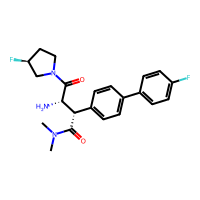
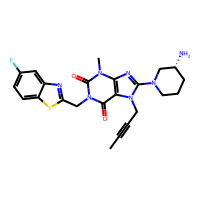
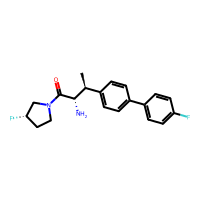
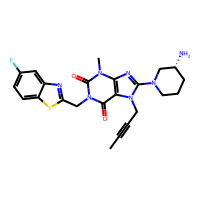
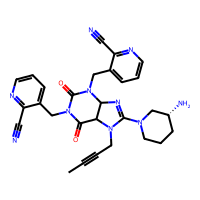
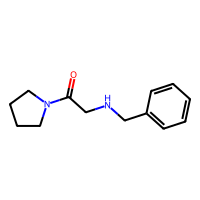
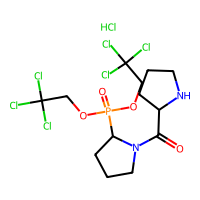
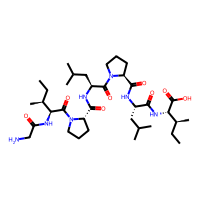
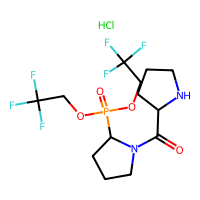
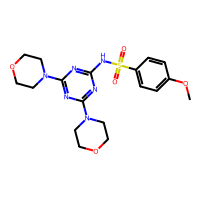

In [17]:
molecules

In [21]:
# Calculate and plot molecular properties for Ro5
molecules["molecular_weight"] = molecules["ROMol"].apply(Descriptors.ExactMolWt)
molecules["n_hba"] = molecules["ROMol"].apply(Descriptors.NumHAcceptors)
molecules["n_hbd"] = molecules["ROMol"].apply(Descriptors.NumHDonors)
molecules["logp"] = molecules["ROMol"].apply(Descriptors.MolLogP)
molecules["n_rotatable"] = molecules["ROMol"].apply(Descriptors.NumRotatableBonds)
molecules["n_aromatic_rings"] = molecules["ROMol"].apply(Descriptors.NumAromaticRings)

# Colors are used for plotting the molecules later
# molecules["color"] = ["red", "green", "blue", "cyan"]
# NBVAL_CHECK_OUTPUT
molecules[["molecular_weight", "n_hba", "n_hbd", "logp", "n_rotatable", "n_aromatic_rings"]]

,molecular_weight,n_hba,n_hbd,logp,n_rotatable,n_aromatic_rings
0,401.191483,3,1,2.56220,5,2
1,481.169622,10,1,1.64460,4,4
2,344.170020,2,1,3.49390,4,2
3,481.169622,10,1,1.64460,4,4
4,536.239670,10,1,0.99706,5,2
...,...,...,...,...,...,...
4396,218.141913,2,1,1.39860,4,1
4397,543.898038,5,1,5.07540,6,0
4398,721.473812,8,6,1.13530,19,0
4399,448.075341,5,1,3.45960,6,0


,molecule_chembl_id,IC50,units,smiles,pIC50,ROMol,molecular_weight,n_hba,n_hbd,logp,n_rotatable,n_aromatic_rings
0,CHEMBL237119,1.200000e-02,nM,CN(C)C(=O)[C@@H](c1ccc(-c2ccc(F)cc2)cc1)[C@H](...,10.920819,,401.191483,3,1,2.56220,5,2
1,CHEMBL4113723,5.000000e-02,nM,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc3cc...,10.301030,,481.169622,10,1,1.64460,4,4
2,CHEMBL237336,6.400000e-02,nM,C[C@@H](c1ccc(-c2ccc(F)cc2)cc1)[C@H](N)C(=O)N1...,10.193820,,344.170020,2,1,3.49390,4,2
3,CHEMBL4113723,8.000000e-02,nM,CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc3cc...,10.096910,,481.169622,10,1,1.64460,4,4
4,CHEMBL5269668,9.000000e-02,nM,CC#CCN1C(N2CCC[C@@H](N)C2)=NC2C1C(=O)N(Cc1cccn...,10.045757,,536.239670,10,1,0.99706,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4396,CHEMBL175260,1.000000e+06,nM,O=C(CNCc1ccccc1)N1CCCC1,3.000000,,218.141913,2,1,1.39860,4,1
4397,CHEMBL268012,1.800000e+06,nM,Cl.O=C(C1CCCN1)N1CCCC1P(=O)(OCC(Cl)(Cl)Cl)OCC(...,2.744727,,543.898038,5,1,5.07540,6,0
4398,CHEMBL4535549,3.830000e+06,nM,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,2.416801,,721.473812,8,6,1.13530,19,0
4399,CHEMBL276884,9.100000e+06,nM,Cl.O=C(C1CCCN1)N1CCCC1P(=O)(OCC(F)(F)F)OCC(F)(F)F,2.040959,,448.075341,5,1,3.45960,6,0

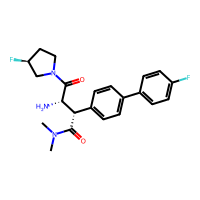
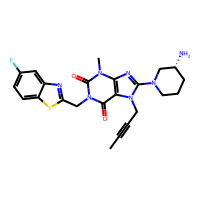
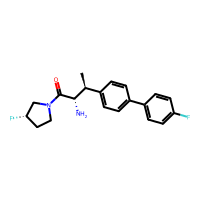
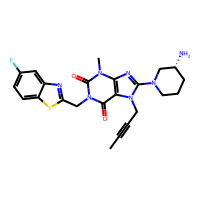
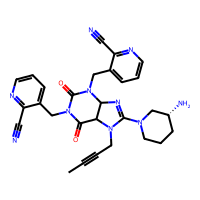
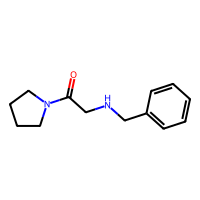
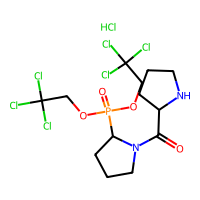
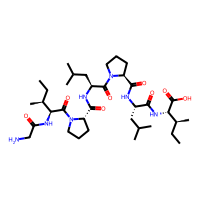
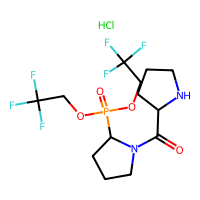
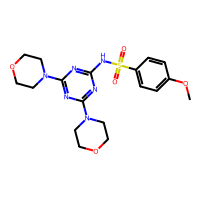

In [22]:
molecules

In [23]:
# Plot the molecule properties as bar plots
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}

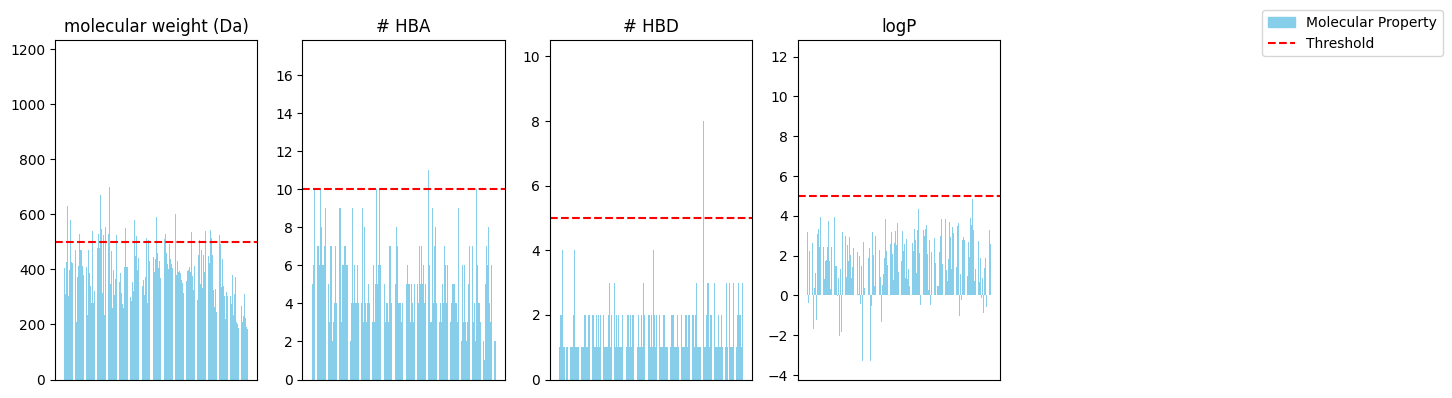

In [27]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=4)

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    # Using the index of DataFrame as x-values
    x = np.arange(len(molecules))
    axes[index].bar(x, molecules[key], color='skyblue')
    axes[index].axhline(y=threshold, color="red", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])  # Optionally, you can add x-ticks as labels if needed

# Generate legend elements based on molecule CHEMBL IDs
legend_elements = [mpatches.Patch(color='skyblue', label='Molecular Property')]
legend_elements.append(Line2D([0], [0], color="red", ls="dashed", label="Threshold"))

# Add legend
fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust layout to fit subplots and legend within the figure canvas
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend
plt.show()

In [ ]:
# For More: https://projects.volkamerlab.org/teachopencadd/talktorials/T002_compound_adme.html